# MTH9879 Homework 1 <font color='blue'> Score: 38/40 </font>

<font color='blue'>
Please see the corresponding cells for comments (in blue) on each individual question, if there's any.
</font>

Assigned: February 3, 2015.
Due: February 17, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

### <font color='blue'> Please follow the Homework submission guidline</font>


<font color='blue'>
http://mfeapp.baruch.cuny.edu/forum/threads/homework-submission-guidelines-spring-2015.10357/. 
Please rename your iPython notebook as 9879HWx_LastName_FirstName, where x = homework number, and the same for the subject of your email for HW submission. Please include your name in your iPython notebook as the first cell. Any violation gets 20% off from that homework, cumulative.
</font>

### <font color='blue'> This time will just be a warning. But from HW3 on, "any violation gets 20% off from that homework, cumulative."</font>


<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 1. (4 points)  <font color='blue'> Score: 4/4 </font>

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

Solution:

Strategy: constant participation rate
Reason cause a crash: this strategy is of splitting the order in such a way that each "child" order represents a fixed fraction of the total trading volume over a given period of time. The problem is as the parent becomes larger, the sub-orders themselves can gice a false impression of large volume, accelerating the main order's execution, which is a snowball effect.
Way to amend it: the trader should make his strategy contingent on the execution price received, trading less as the price impact increases.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which has all the functions required for the problem.

In [1]:
#%load_ext rmagic
%load_ext rpy2.ipython

In [2]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip'
Content type 'application/zip' length 1485 bytes
opened URL
downloaded 1485 bytes



In [3]:
%%R
source("ziSetup.R")

### 2. (4 points) <font color='blue'> Score: 4/4 </font>

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

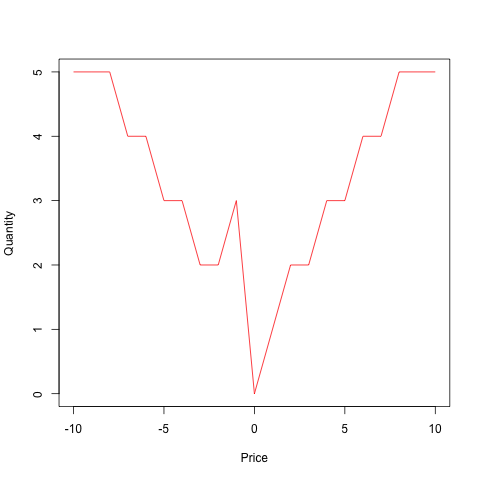

In [4]:
%%R    # Problem 2

logging <- F # very important for speed

alpha <- 1
mu <- 10
delta <- 1/5 

# Initialize the book
initializeBook5()

# Add two best bid limit orders into the book 
limitBuyOrder(bestBid())
limitBuyOrder(bestBid())

# Start to plot
bookPlot(10)

### 3. (16 points) <font color='blue'> Score: 16/16 </font>

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).

(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

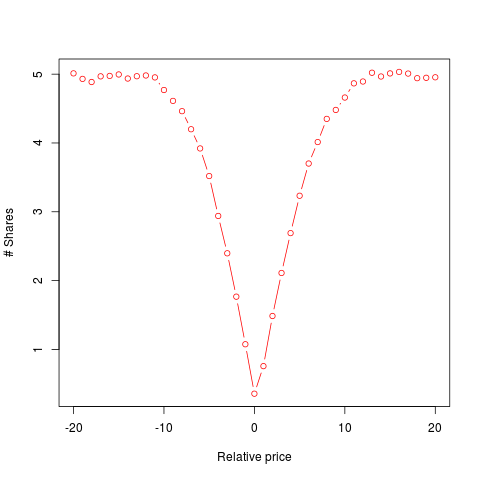

In [11]:
%%R
# Figure 2: Average book shape (This take some time to run!)

logging <- F # Very important for speed!

alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()
# Burn in for 100 events
for(count in 1:100){
  generateEvent()
}
numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

(c) The slope of the book is around 0.5 , while the dimensional analysis is $\frac{\alpha^2}{\mu\,\delta} = 0.5$

(d) The depth of the book is around 5, while the dimensional analysis is $\alpha/\delta = 5$

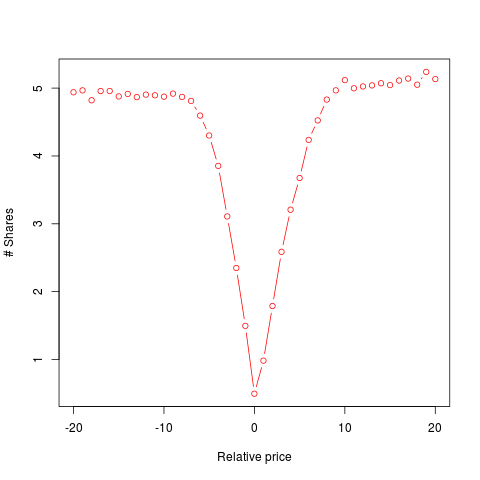

In [7]:
%%R
# Figure 2: Average book shape (This take some time to run!)

logging <- F # Very important for speed!

alpha <- 1
mu <- 8
delta <- 1/5 
initializeBook5()
# Burn in for 100 events
for(count in 1:100){
  generateEvent()
}
numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

(c) The slope of the book is around 5/8, while the dimensional analysis is $\frac{\alpha^2}{\mu\,\delta} = 5/8$

(d) The depth of the book is around 5, while the dimensional analysis is $\alpha/\delta = 5$

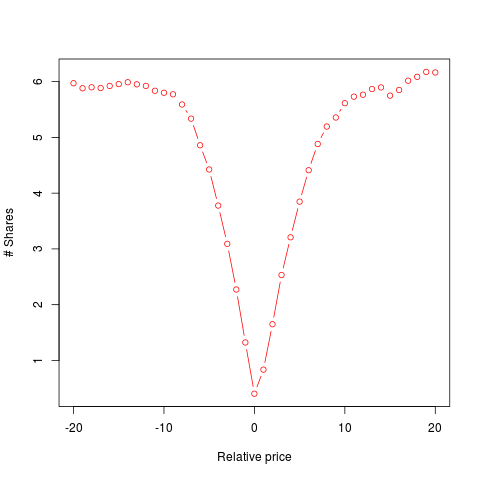

In [8]:
%%R
# Figure 2: Average book shape (This take some time to run!)

logging <- F # Very important for speed!

alpha <- 1
mu <- 10
delta <- 1/6 
initializeBook5()
# Burn in for 100 events
for(count in 1:100){
  generateEvent()
}
numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

(c) The slope of the book is around 3/5, while the dimensional analysis is $\frac{\alpha^2}{\mu\,\delta} = 3/5$

(d) The depth of the book is around 6, while the dimensional analysis is $\alpha/\delta = 6$

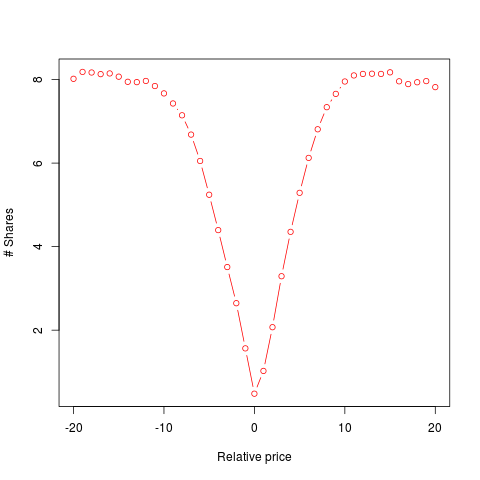

In [9]:
%%R
# Figure 2: Average book shape (This take some time to run!)

logging <- F # Very important for speed!

alpha <- 1
mu <- 10
delta <- 1/8 
initializeBook5()
# Burn in for 100 events
for(count in 1:100){
  generateEvent()
}
numEvents <- 100000 # Average over 100,000 events
avgBookShape <- bookShape(20)/numEvents
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
}

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")

(c) The slope of the book is around 4/5, while the dimensional analysis is $\frac{\alpha^2}{\mu\,\delta} = 4/5$

(d) The depth of the book is around 8, while the dimensional analysis is $\alpha/\delta = 8$

### The following code sets up the data required for Problem 4.

In [5]:
%%R
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip'
Content type 'application/zip' length 130237 bytes (127 Kb)
opened URL
downloaded 127 Kb



### 4. (12 points) <font color='blue'> Score: 12/12 </font>

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [11]:
%R head(data.frame(ziSimResults))

array([[-1., -1., -2.,  0., -2., -2.],
       [ 2.,  4., -1.,  3.,  2.,  0.],
       [-2., -3., -1., -2.,  0., -4.],
       [ 2., -1.,  0.,  3.,  4.,  1.],
       [-2., -2., -1., -2.,  0., -1.],
       [ 4.,  3.,  0.,  3.,  3.,  1.],
       [-1.,  1., -1., -2.,  3., -3.],
       [ 3.,  3.,  3.,  1.,  5.,  2.],
       [-1., -2., -2.,  0., -2., -1.],
       [ 3.,  1.,  2.,  3.,  2.,  3.],
       [-1., -1., -1., -1.,  0.,  1.],
       [ 2.,  0.,  2.,  2.,  3.,  3.],
       [-1., -1.,  2., -1., -1., -1.],
       [ 2.,  3.,  3.,  1.,  2.,  1.],
       [ 0.,  0., -1., -1., -1.,  1.],
       [ 3.,  4.,  1.,  2.,  2.,  2.],
       [-1., -1., -1., -1., -1.,  3.],
       [ 2.,  1.,  1.,  0.,  2.,  4.],
       [-1.,  1., -1., -1.,  1.,  2.],
       [ 0.,  2.,  0.,  3.,  3.,  3.]])

(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.

(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

In [6]:
%%R    # (a)

# Parse the original data into a data frame
bidAskPrice <- data.frame(ziSimResults)

# Declare a mid price matrix which is used to store the mid price
midPrice <- matrix(nrow = 10000, ncol = 10)

# Calculate the mid price matrix
for(k in 1:10){
    for(j in 1:10000){
        midPrice[j, k] = (bidAskPrice[j, 2*k-1] + bidAskPrice[j, 2*k])/2
    }
}

meanVec = vector(10, mode = "numeric")
sdVec = vector(10, mode = "numeric")

# Calculate the mean and standard deviation of the mean
for(i in 1:10){
    meanVec[i] = mean(midPrice[,i])
    sdVec[i] = sd(midPrice[,i])/sqrt(10000)
}

cat("The mean mid price after 10000 event is: ", meanVec, "\n")
cat("The standard deviation of the mean is: ", sdVec, "\n")

The mean mid price after 10000 event is:  0.0059 0.2155 0.4135 0.56635 0.6685 0.7411 0.8053 0.80955 0.8388 0.83435 
The standard deviation of the mean is:  0.01537986 0.0143163 0.01310835 0.01229115 0.01123358 0.01038017 0.01019091 0.009888385 0.009779878 0.009617315 


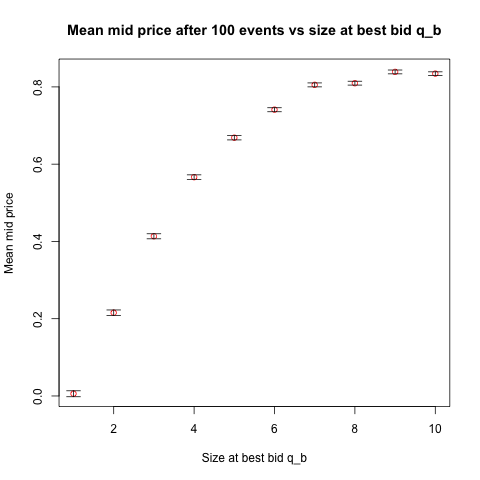

In [7]:
%%R    # (b)

# size of best bid
q_b <- 1:10

# Start to plot and add the error bars
plot(q_b,meanVec,xlab="Size at best bid q_b",ylab="Mean mid price",main="Mean mid price after 100 events vs size at best bid q_b", col="red")
q_bHigh <- q_b
meanHigh <- meanVec + sdVec/2
q_bLow <- q_b
meanLow <- meanVec - sdVec/2
arrows(q_bLow, meanLow, q_bHigh, meanHigh, length=0.1, angle=90, code=3)

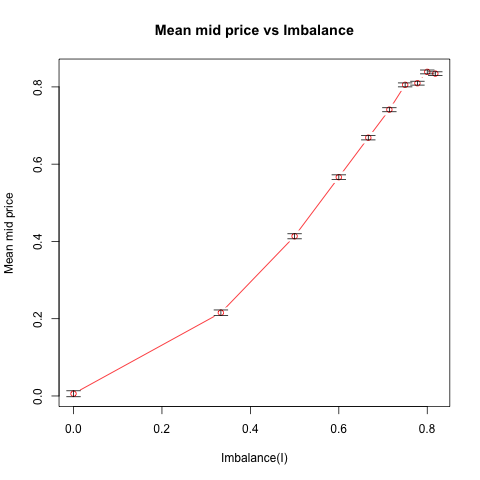

In [8]:
%%R    # (c)

# Imbalance
I <- (q_b-1)/(q_b+1)

# Start to plot and add the error bars
plot(I,meanVec,xlab="Imbalance(I)",ylab="Mean mid price",main="Mean mid price vs Imbalance", col="red", type="b")
IHigh <- I
meanHigh <- meanVec + sdVec/2
ILow <- I
meanLow <- meanVec - sdVec/2
arrows(ILow, meanLow, IHigh, meanHigh, length=0.1, angle=90, code=3)

(d) If an order book has large quantity at the bid and small quantity at the offer, imbalance increases, accrording to graphs above, the future price increases.

## Is the market price a martingale?

### 5. (4 points)  <font color='blue'> Score: 2/4 </font>

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

Answer:

The fundamental pricing theorem says that the market is arbitrage free only if there exists a risk neutral probability such that the discounted price process is a martingale. This theorem has two conditions: under the risk neutral measure and the discounted price process, not the real price process. So, normally, the price of the asset under the real world probability is not a martingale.

<font color=blue> (2pts off) The key points are:
* Microstructure models show that if you condition on the state of the book or the history of order flow, you can predict future prices. 

* If you don’t condition either on the state of the order book or on the history of order flow (as might be typically the case for delta hedgers), the price process can be a martingale.